In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import plotly.express as px 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv("/Users/Oswal/Documents/GitHub/Health-Insurance-Cross-Sell-Prediction-/test.csv")
train = pd.read_csv("/Users/Oswal/Documents/GitHub/Health-Insurance-Cross-Sell-Prediction-/train.csv")

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
train.isnull().sum()/len(train)

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [7]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [8]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [10]:
test.isnull().sum()/len(test)

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
dtype: float64

/var/folders/m7/gmztn8ls7hvb7z45rrh281mh0000gn/T/ipykernel_66121/3039123934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr().round(2)


<AxesSubplot: >

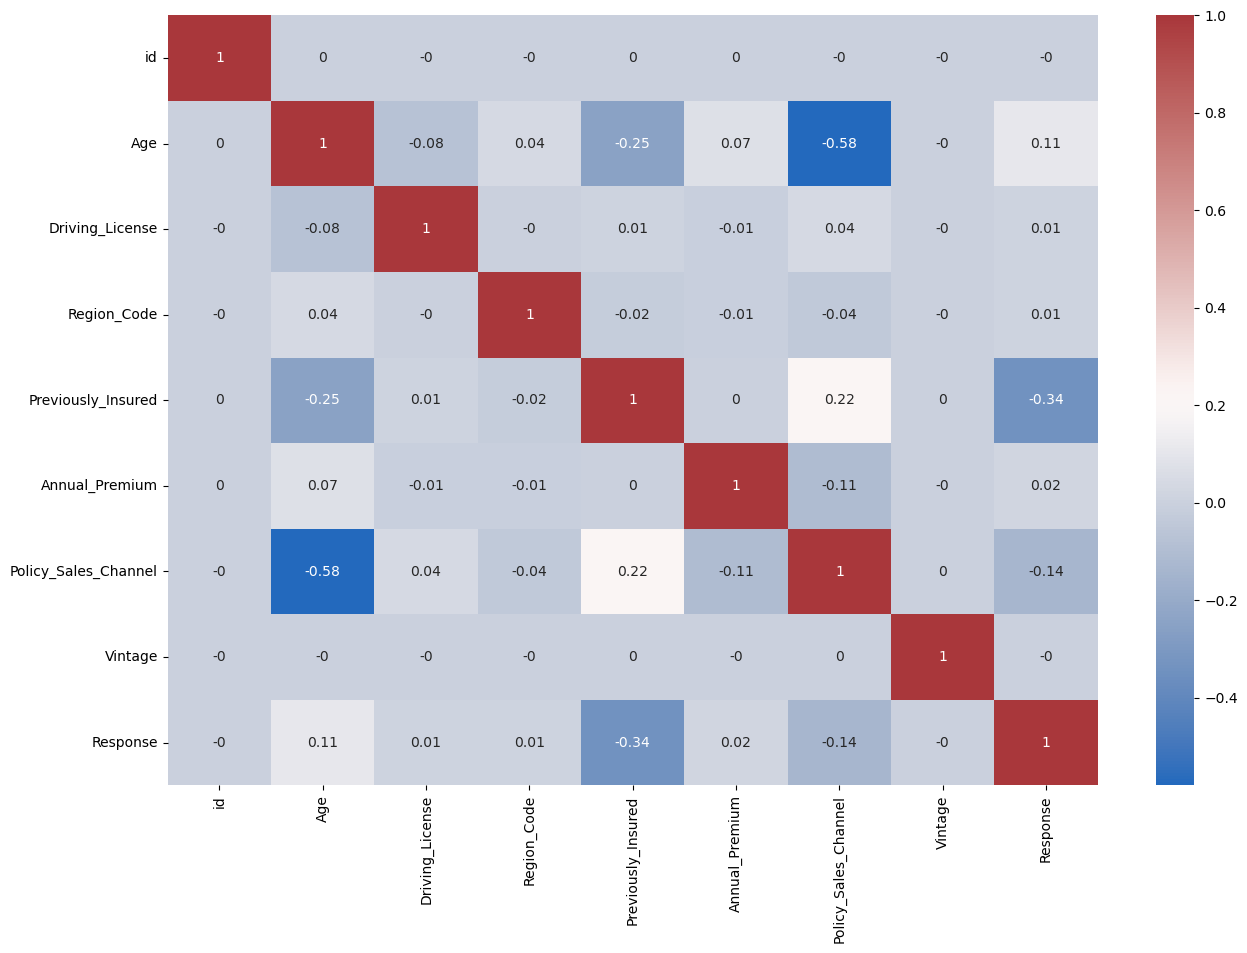

In [11]:
correlation = train.corr().round(2)
plt.figure(figsize = (15, 10))
sns.heatmap(correlation, annot = True, cmap= 'vlag')


<AxesSubplot: title={'center': 'Gender'}, xlabel='Gender', ylabel='count'>

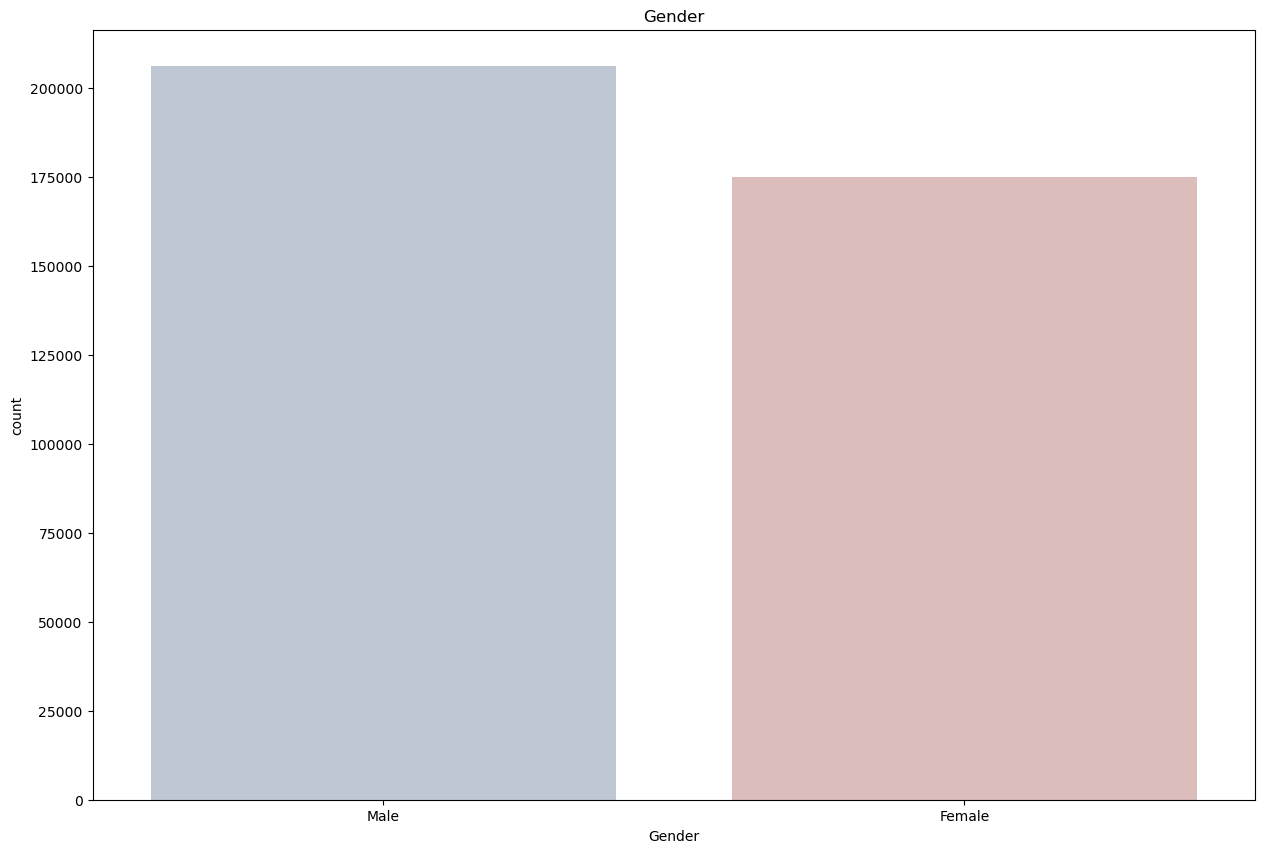

In [12]:
plt.figure(figsize= (15, 10))
plt.gca().set_title('Gender') 
sns.countplot(x = 'Gender', palette= 'vlag', data = train)

In [13]:
# Check the number of unique values in the 'region_code' column
num_unique_regions = train['Region_Code'].nunique()

print(f"There are {num_unique_regions} unique values in the 'region_code' column.")

There are 53 unique values in the 'region_code' column.


/var/folders/m7/gmztn8ls7hvb7z45rrh281mh0000gn/T/ipykernel_66121/1668891155.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = 'Region_Code', palette='icefire', data= train)


<AxesSubplot: title={'center': 'Region Demographics'}, xlabel='Region_Code', ylabel='Count'>

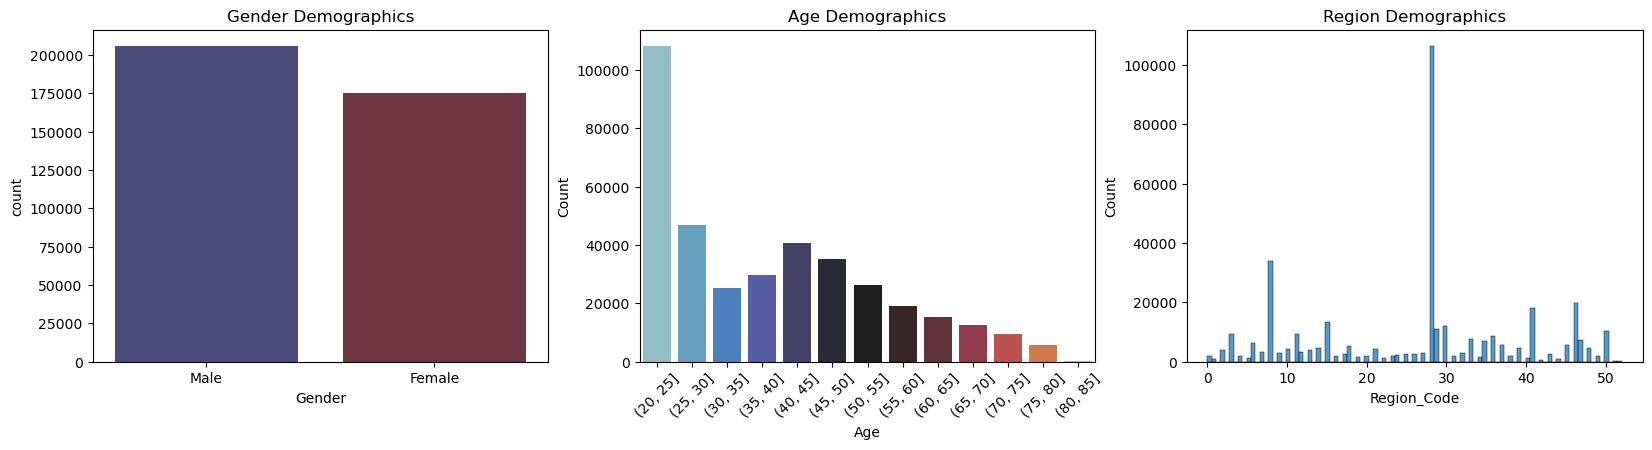

In [14]:
plt.figure(figsize= (20, 25))

plt.subplot(5,3,1)
plt.gca().set_title('Gender Demographics')
sns.countplot(x = 'Gender', palette='icefire', data= train)

# Create age bins with a width of 10 years each
age_bins = pd.cut(train['Age'], bins=range(20, 90, 5))

plt.subplot(5,3,2)
plt.gca().set_title('Age Demographics')
sns.countplot(x=age_bins, palette='icefire')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(5,3,3)
plt.gca().set_title('Region Demographics')
sns.histplot(x = 'Region_Code', palette='icefire', data= train)





<AxesSubplot: title={'center': 'Vehicle Age'}, xlabel='Vehicle_Age', ylabel='count'>

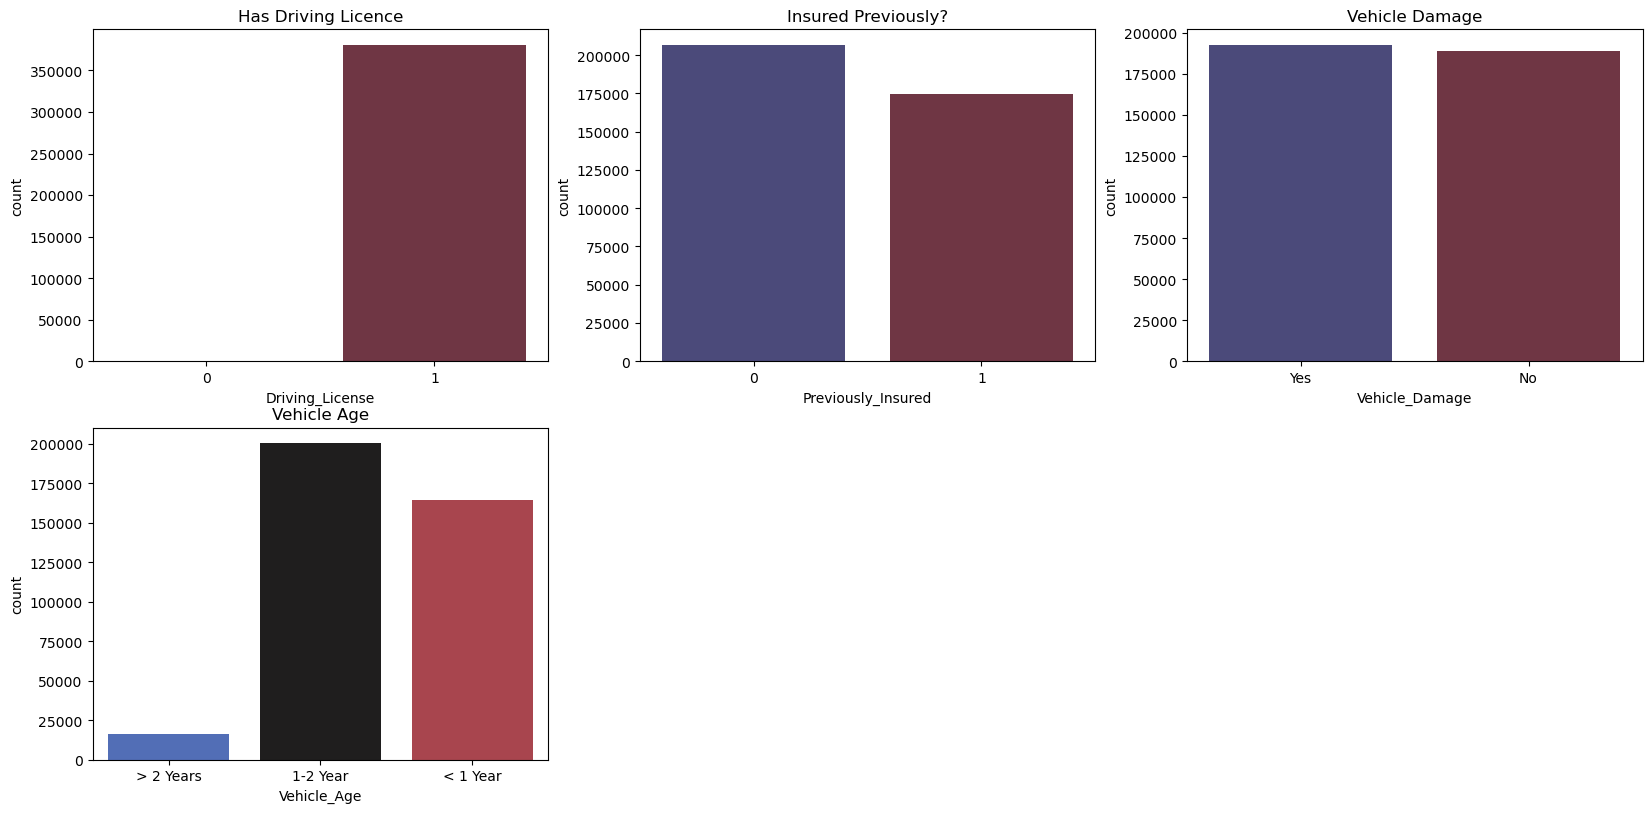

In [15]:
plt.figure(figsize= (20, 25))

plt.subplot(5,3,1)
plt.gca().set_title('Has Driving Licence')
sns.countplot(x = 'Driving_License', palette='icefire', data= train)


plt.subplot(5,3,2)
plt.gca().set_title('Insured Previously?')
sns.countplot(x = 'Previously_Insured', palette='icefire', data= train)

plt.subplot(5,3,3)
plt.gca().set_title('Vehicle Damage')
sns.countplot(x = 'Vehicle_Damage', palette='icefire', data= train)

plt.subplot(5,3,4)
plt.gca().set_title('Vehicle Age')
sns.countplot(x = 'Vehicle_Age', palette='icefire', data= train)


In [17]:
import plotly.graph_objs as go
import plotly.subplots as sp
import pandas as pd


In [5]:
# Create subplots
#fig = sp.make_subplots(rows=5, cols=2, subplot_titles=("Gender vs Response", "Previously Insured vs Response",
                                                      #"Vehicle Age vs Response", "Vehicle Damage vs Response",
                                                      #"Driving License vs Response", "Age vs Response",
                                                      #"Region Code vs Response", "Annual Premium vs Response",
                                                      #"Policy Sales Channel vs Response", "Vintage vs Response"))

In [2]:
# Add traces to subplots
#fig.add_trace(go.Bar(x=train['Response'], y=train['Gender'], marker_color='indianred', name='Male'), row=1, col=1)
#fig.add_trace(go.Bar(x=train['Response'], y=train['Gender'], marker_color='lightsalmon', name='Female'), row=1, col=1)

#fig.add_trace(go.Bar(x=train['Response'], y=train['Previously_Insured'], marker_color='indianred', name='Yes'), row=1, col=2)
#fig.add_trace(go.Bar(x=train['Response'], y=train['Previously_Insured'], marker_color='lightsalmon', name='No'), row=1, col=2)

#fig.add_trace(go.Bar(x=train['Response'], y=train['Vehicle_Age'], marker_color='indianred', name='< 1 Year'), row=2, col=1)
#fig.add_trace(go.Bar(x=train['Response'], y=train['Vehicle_Age'], marker_color='lightsalmon', name='1-2 Year'), row=2, col=1)
#fig.add_trace(go.Bar(x=train['Response'], y=train['Vehicle_Age'], marker_color='lightgreen', name='> 2 Years'), row=2, col=1)

#fig.add_trace(go.Bar(x=train['Response'], y=train['Vehicle_Damage'], marker_color='indianred', name='Yes'), row=2, col=2)
#fig.add_trace(go.Bar(x=train['Response'], y=train['Vehicle_Damage'], marker_color='lightsalmon', name='No'), row=2, col=2)

#fig.add_trace(go.Bar(x=train['Response'], y=train['Driving_License'], marker_color='indianred', name='Valid'), row=3, col=1)
#fig.add_trace(go.Bar(x=train['Response'], y=train['Driving_License'], marker_color='lightsalmon', name='Invalid'), row=3, col=1)

#fig.add_trace(go.Histogram(x=train[train['Response']==1]['Age'], marker_color='indianred', name='Response=1'), row=3, col=2)
#fig.add_trace(go.Histogram(x=train[train['Response']==0]['Age'], marker_color='lightsalmon', name='Response=0'), row=3, col=2)

#fig.add_trace(go.Histogram(x=train[train['Response']==1]['Region_Code'], marker_color='indianred', name='Response=1'), row=4, col=1)
#fig.add_trace(go.Histogram(x=train[train['Response']==0]['Region_Code'], marker_color='lightsalmon', name='Response=0'), row=4, col=1)

#fig.add_trace(go.Histogram(x=train[train['Response']==1]['Annual_Premium'], marker_color='indianred', name='Response=1'), row=4, col=2)
#fig.add_trace(go.Histogram(x=train[train['Response']==0]['Annual_Premium'], marker_color='lightsalmon', name='Response=0'), row=4, col=2)

#fig.add_trace(go.Histogram(x=train[train['Response']==1]['Policy_Sales_Channel'], marker_color='indianred', name='Response=1'), row=5, col=1)
#fig.add_trace(go.Histogram(x=train[train['Response']==0]['Policy_Sales_Channel'], marker_color='lightsalmon', name='Response=0'), row=5, col=1)

#fig.add_trace(go.Histogram(x=train[train['Response']==1]['Vintage'], marker_color='indianred', name='Response=1'), row=5, col=2)
#fig.add_trace(go.Histogram(x=train[train['Response']==0]['Vintage'], marker_color='lightsalmon', name='Response=0'), row=5, col=2)


In [3]:
### Update layout
#fig.update_layout(title="Bivariate Analysis between Target Variable and Features", title_font=dict(size=24, color='black', family='Arial'),
#height=1000, width=1000, showlegend=True, legend=dict(font=dict(size=14)))


In [1]:
# Update x-axis and y-axis labels
#fig.update_xaxes(title_text="Response", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=1, col=1)
#fig.update_xaxes(title_text="Response", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=1, col=2)
#fig.update_xaxes(title_text="Response", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=2, col=1)
#fig.update_xaxes(title_text="Response", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=2, col=2)
#fig.update_xaxes(title_text="Response", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=3, col=1)
#fig.update_xaxes(title_text="Age", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=3, col=2)
#fig.update_xaxes(title_text="Region Code", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=4, col=1)
#fig.update_xaxes(title_text="Annual Premium", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=4, col=2)
#fig.update_xaxes(title_text="Policy Sales Channel", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=5, col=1)
#fig.update_xaxes(title_text="Vintage", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=5, col=2)

#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=1, col=1)
#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=1, col=2)
#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=2, col=1)
#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=2, col=2)
#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=3, col=1)
#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=3, col=2)
#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=4, col=1)
#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=4, col=2)
#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=5, col=1)
#fig.update_yaxes(title_text="Count", title_font=dict(size=18, family='Arial'), tickfont=dict(size=14), row=5, col=2)

# Show figure
#fig.show()

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
